# Select index components & import data
## Market value-weighted index
+ composite performance of various stocks
+ Components weighted by market cap
     - market value = share price * number of shares
+ Larger components get higher perrcentage weightings


## build a cap-weighted Index
+ Apply new skills to construct value-weighted index
    - Select components from exchange listing data largest companies in each sector
    - get component number of shares and stock prices
    - calculate component weights
    - Calculate index
    - evaluate performance of components and index
    
## Load stock listing data

    
    


In [3]:
import pandas as pd
#nyse=pd.read_clipboard() # dont run this unless you have the excel spreadsheet open to the nyse sheet and select it all
#nyse.info()

ParserError: Expected 1 fields in line 7, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

## Load & prepare listing data

        nyse['Stock Symbol'] = nyse['Stock Symbol'].astype(str)
        nyse.set_index('Stock Symbol', inplace=True)
        nyse.dropna(subset=['Sector'], inplace = True) #drop if no sector definition
        nyse['Market Capitalization'] /= 1e6   # in million usd
Again, nyse is undefined unless you read the data in from the clipboard

In [ ]:
#nyse


In [ ]:
#nyse.columns


## Select index components

        components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
        components.sort_values(ascending=False)

## Import & prepare listing data

All of these cells rely on nyse but the code is right.
        tickers = components.index.get_level_values('Stock Symbol')
        #or we can just do 
        tickers = components.index.get_level_values(1)
It is a multi-index situation so we are gleaning the symbols of our index

## Stock index components

Not to be a broken record here but, yeah we need the NYSE dataframe and I don't have it in my clipboard anymore.

        columns = ['Company Name', 'Market Capitalization', 'Last Sale']
        component_info = nyse.loc[tickers, columns]
        pd.options.display.float_format = '{:,.2f}'.format
we are subsetting the 12 rows that relate to our index and just those three columns. Our pupose is to get 
"shares outstanding" which we get from market cap divided by price. 

           

## import & prepare listing data

unfortunately we do not have the stocks.csv file which apparently has daily price data from 2016 for the nyse
To glean the data we need (just the 12 symbols tha tmake up our index not the whole universe of stocks in the database), the code looks like this:

        data = pd.read_csv('stocks.csv', parse_dates=['Date'],
                                         index_col = 'Date').loc[:,tickers.tolist()]  
                                         


so i am working the exercise and i need to calculate the returns over the time period for each of the 12 symbols in my ticker index. There is a stock_data.csv file that just happens to have the same data that they are using for this assignmentt; in other words the subset of stocks.csv with the indexes we selected.
So we pick up where we left off in the exercise with the dataframe from the file 'stock_data.csv' having daily prices for
each component of our index.




In [7]:
my_index_data = pd.read_csv('./data/stock_data.csv', parse_dates=['Date'],index_col='Date')
my_index_data.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [8]:
my_index_data.tail()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20
2016-12-29,116.73,147.78,765.15,13.88,77.27,238.18,128.72,103.77,32.47,38.90,9.13,114.98
2016-12-30,115.82,146.21,749.87,13.85,76.49,239.45,128.04,103.25,32.29,38.46,9.20,114.64


In [5]:
price_return = my_index_data.iloc[-1].div(my_index_data.iloc[0]).sub(1).mul(100)
price_return.sort_values(ascending=False)

AMZN    460.022405
ILMN    319.116203
MA      302.063863
AAPL    278.868171
EL      215.162752
CPRT    204.395604
AMGN    153.309078
UPS      97.043658
GS       38.346429
PAA      19.592593
RIO     -31.358201
TEF     -67.775832
dtype: float64

## Let's plot this bitch!

In [ ]:
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')

Unfortunately, the index in the course has a different set of symbols that got generated using the listings file, but I dont have the price data on these stocks so we may have a problem following along the lecture. We will try to apply the building of the market-cap weighted index using this very nice series above

# Build a market-cap weighted index 
(not sure at this point if that is synonymous with market-value ATM i think it is though)

+ key inputs
 + number of shares
 + Stock price series 
 + __AGGREGATE MARKET VALUE PER PERIOD = TOTAL SHARES `*` PRICE__
 + normalize index to start at 100

## Stock index components from before 
recap from above:

In [ ]:

component_info

## Number of shares outstanding = market capitalization / last

In [ ]:
shares = component_info['Market Capitalization'].div(component_info['Last Sale'])
shares

+ Market Capitalization=Number of Shares x Share Price
## Historical Stock prices
Now we multiply the number of shares by the historical price data to get a market cap series. Unfortunately, we need to switch back to our ticker list and let's see if we can grab the needed listing data for our ticker list from before.


#### step one grab our ticker symbols and turn them into a list.

In [ ]:
ticker_index = my_index_data.columns
ticker_list = ticker_index.tolist()
ticker_list


In [ ]:
ticker_list = [
 'EL',
 'GS',
 'MA',
 'PAA',
 'RIO',
 'TEF',
 'UPS']

Houston we have a problem. ['AAPL', 'AMGN', 'AMZN', 'CPRT', 'ILMN'] are not on the nyse dataframe. They are NASDAQ. Maybe if we are lucky there is data for them. Meanwhile we try again to get the shares outstanding data for the guys in our index that *are* on the nyse ...

In [ ]:
nyse_data = nyse.loc[ticker_list,['Market Capitalization','Last Sale']]
nyse_data

Ok that's nice. Now we either go with a seven symbol index or we find some data. BRB checking the data directory

In [ ]:
my_index_nasdaq = pd.read_clipboard()
my_index_nasdaq.info()

always seems like it will be easier than it is. Still got to wrangle a bit to 
make it so the dataframes match up right. Colomn switch in excel before copying to 
clipboard and a set_index with inplace = True, finaly did the trick.

In [ ]:


nyse_data.info()

In [ ]:

my_index_nasdaq['Market Capitalization'] /= 1E6
my_index_nasdaq.set_index('Stock Symbol', inplace=True)

my_index_nasdaq.info()

OK so now next steps:
+ merge the two dfs together
+ calculate shares outstanding
+ create a dataframe that is a running market_cap dataframe by multiplying shares outstanding by each daily price


#### Merge together

In [ ]:
my_index = nyse_data.append(my_index_nasdaq)
my_index = my_index.sort_values('Market Capitalization',ascending = False)
my_index

#### calculate shares outstanding


In [ ]:
shares = my_index['Market Capitalization'].div(my_index['Last Sale'])
shares

#### multiply price by shares outstanding to get daily market cap

In [ ]:
market_cap_series = my_index_data.mul(shares)
market_cap_series

## From stock prices to market value 

In [ ]:
market_cap_series.first('D').append(market_cap_series.last('D'))

## Aggregate market value per period

In [ ]:
agg_mcap = market_cap_series.sum(axis=1)
agg_mcap.plot(title='aggregate Market cap')


ew I am using ten years of data. Mr teacher is using one year of data. Too lazy to subset at this point. Ok we are almost there we just need to normalize it or something.

## Value-based index

In [ ]:
my_value_based_index = agg_mcap.div(agg_mcap.iloc[0]).mul(100)   #divide by first value
my_value_based_index.plot(title='Furrow? This is a market-cap weighted index')

## Evaluate your value-weighted index
+Index return
 + Total index return
 + Contribution by component
+Performance vs Benchmark
 + Total period retun
 + Rolling returns for sub periods
 
 ## Value contribution by stock
 

In [ ]:
agg_mcap.iloc[-1]-agg_mcap.iloc[0]

In [ ]:
change = market_cap_series.first('D').append(market_cap_series.last('D'))
change

In [ ]:
change.diff().iloc[-1].sort_values()  #or .loc('2016-12-30')

To compute the contribution of each component to the index return let's first
calculate the component weights

In [ ]:
my_index

In [ ]:
market_cap = my_index['Market Capitalization']
weights = market_cap.div(market_cap.sum())
weights.sort_values().mul(100)

## Value-weighted component returns

In [ ]:
index_return = (my_value_based_index.iloc[-1] / my_value_based_index.iloc[0]-1)*100
index_return

In [ ]:
weighted_returns = weights.mul(index_return)
weighted_returns.sort_values().plot(kind='barh')

In [ ]:
type(weighted_returns)

In [ ]:
data = my_value_based_index.to_frame('Index')  #convert series to dataframe so we can add a column
data['SP500'] = pd.read_csv('./data/sp500.csv',parse_dates=['date'],index_col='date')
data.head()


we want normalized returns of our benchmark the s & p 500 to compare against our index

In [ ]:
data.SP500.div(data.SP500.iloc[0], axis=0).mul(100)
data.plot()

ok maybe we did it right maybe not. Not sure with so many changed variables and using a different data set but at least there is no error heheh

## Performance vs benchmark:30D rolling return
We define a function to calculate multi period return.

        def multi_period_return(r):
        return (np.prod(r+1) -1) * 100
        data.rolling('30D').apply(multi_period_return)
    

## Some additional analysis of our index
+ Daily return correlations:
+ Calculate among all components
+ Visualize the result as heatmap
+ Write results to excel using .xls and .xlsx formats
 + Single worksheet
 + Multiple worksheets

Make a nice correlation matrix with the index

        daily_returns = data.pct_change()
        correlations = daily_returns.corr()

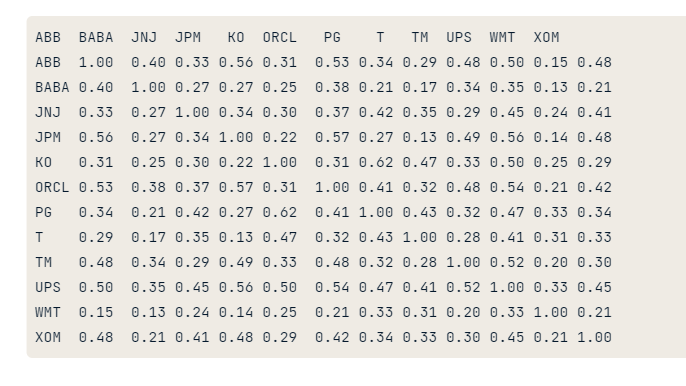

        import seaborn as sns
        sns.heatmap(correlations, annot=True)  #annotations
        plt.xticks(rotation=45)
        plt.title('Daily Return Correlations')

## Saving to a single Excel worksheet

        correlations.to_excel(excel_writer= 'correlations.xls',
                              sheet_name='correlations',
                              startrow=1
                              startcol=1)
Writes single sheeto to xls file. Pass file name and sheet name at the minimumm 
## Saving to multiple Excel worksheets


        data.index = data.index.date # keep just the date component we remove the time 
        with pd.ExcelWriter('stock_data.xlsx') as writer:
            corr.to_excel(excel_writer=writer, sheet_name='correlations')
            data.to_excel(excel_writer=writer, sheet_name='prices')
            data.pct_change().to_excel(writer, sheet_name='returns')

## Hooray a real life example correlation matrix

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
stock_prices = pd.read_csv('./data/stock_data.csv', parse_dates=['Date'],index_col='Date') # Inspect stock_prices here
print(stock_prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [15]:
# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)



          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   
GS    0.344981  0.390076  0.333402  0.423160  0.358318  1.000000  0.266063   
ILMN  0.264791  0.336927  0.242726  0.265665  0.214027  0.266063  1.000000   
MA    0.391421  0.400230  0.428330  0.401352  0.431556  0.466796  0.301392   
PAA   0.212960  0.229255  0.182438  0.221273  0.206056  0.271982  0.162796   
RIO   0.361684  0.313878  0.326229  0.384944  0.415416  0.527298  0.234445   
TEF   0.325309  0.374555  0.331867  0.376767  0.428925  0.498230  0.231173   
UPS   0.366039  0.432468  0.378399  0.462716  0.456952  0.506407

## Plot a heatmap of daily return correlations

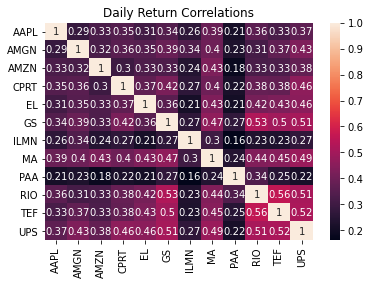

In [16]:
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()